<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


## Objectives


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-07-31 09:10:53--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  19.4MB/s    in 1.8s    

2022-07-31 09:10:55 (19.4 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


array([[<AxesSubplot:title={'center':'ConvertedComp'}>]], dtype=object)

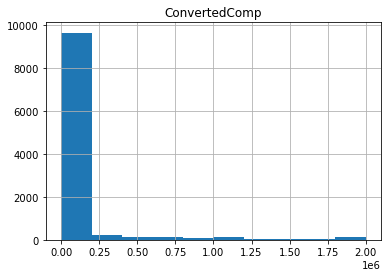

In [10]:
QUERY = """ 
Select ConvertedComp from master
"""
df = pd.read_sql_query(QUERY,conn)
df.hist()

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

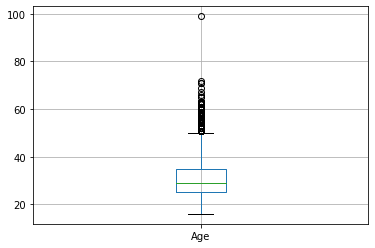

In [11]:
QUERY = """ 
Select Age from master
"""
df = pd.read_sql_query(QUERY,conn)
df.boxplot()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

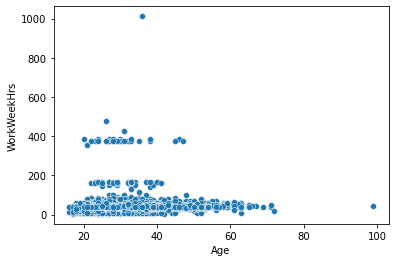

In [12]:
import seaborn as sns

QUERY = """
Select Age, WorkWeekHrs From master
"""
df = pd.read_sql_query(QUERY,conn)

sns.scatterplot(data=df, x="Age", y="WorkWeekHrs")


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<AxesSubplot:xlabel='CodeRevHrs', ylabel='WorkWeekHrs'>

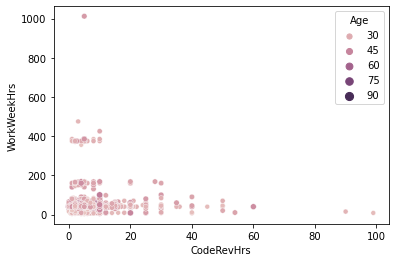

In [47]:
QUERY = """
Select Age, WorkWeekHrs, CodeRevHrs From master
"""
df = pd.read_sql_query(QUERY,conn)
sns.scatterplot(data=df, x="CodeRevHrs", y="WorkWeekHrs", size="Age", hue="Age")

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


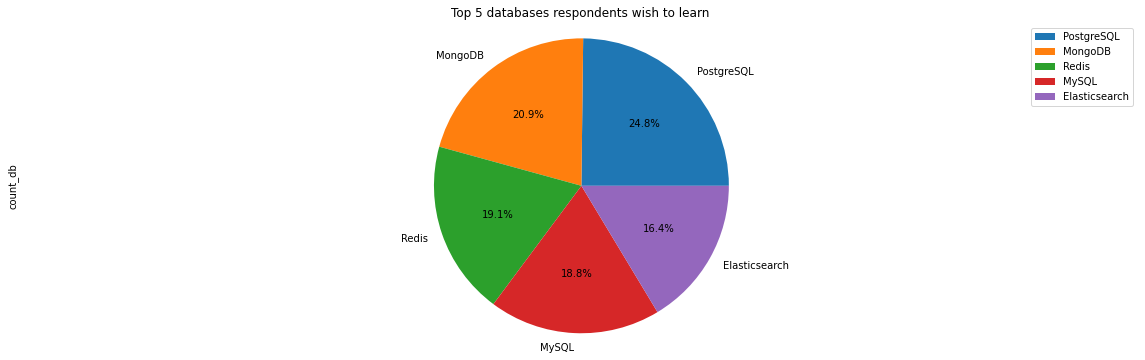

In [51]:
import matplotlib.pyplot as plt

QUERY = """ 
Select DatabaseDesireNextYear, COUNT(DatabaseDesireNextYear) as count_db
From DatabaseDesireNextYear 
group by DatabaseDesireNextYear 
order by count_db DESC LIMIT 5 
""" 

df=pd.read_sql_query(QUERY,conn)  
df.set_index('DatabaseDesireNextYear', inplace=True) 

df.plot.pie(y='count_db', figsize=(20,6),autopct='%1.1f%%')

plt.title('Top 5 databases respondents wish to learn') 
plt.axis('equal')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


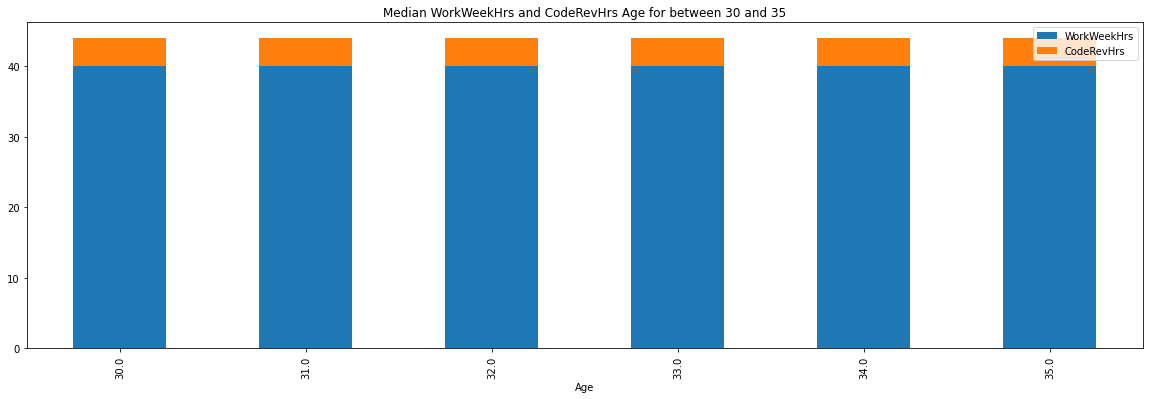

In [55]:
QUERY = """
Select WorkWeekHrs, CodeRevHrs, Age From master
Where Age Between 30 AND 35
"""
df = pd.read_sql_query(QUERY,conn)
df1 = df.groupby('Age').median()

df1.plot(kind='bar', stacked=True,  figsize=(20,6))

plt.title('Median WorkWeekHrs and CodeRevHrs for Age between 30 and 35')
plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


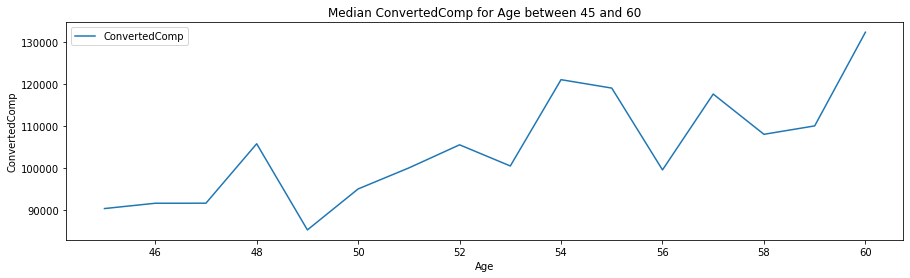

In [57]:
QUERY = """
SELECT ConvertedComp, Age FROM master
WHERE Age BETWEEN 45 AND 60
"""
df = pd.read_sql_query(QUERY,conn)
df1 = df.groupby('Age').median()

df1.plot(kind='line', figsize=(15, 4))

plt.title('Median ConvertedComp for Age between 45 and 60')
plt.ylabel('ConvertedComp')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<AxesSubplot:>

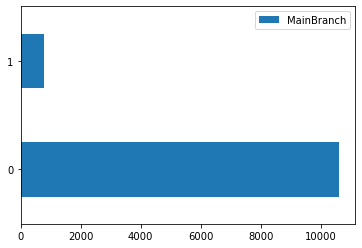

In [60]:
QUERY = """
SELECT MainBranch, COUNT(*) as MainBranch
from master
group by MainBranch
"""

df=pd.read_sql_query(QUERY,conn)

df.plot(kind='barh')


Close the database connection.


In [61]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
